In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import scipy.stats as stats
import statsmodels.formula.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from     sklearn import metrics
from     sklearn.neighbors import KNeighborsRegressor
from     sklearn.model_selection import GridSearchCV

In [2]:
mpg_df = pd.read_csv('D:\\Supervised Learning Classification\\car-mpg.csv')
mpg_df.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_type,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,0,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,0,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,0,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,0,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,0,ford torino


In [3]:
mpg_df.shape

(398, 10)

In [4]:
mpg_df.describe()

,mpg,cyl,disp,wt,acc,yr,origin,car_type
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864,0.530151
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055,0.499718
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000,0.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000,0.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000,1.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000,1.000000


In [5]:
type(mpg_df)

pandas.core.frame.DataFrame

In [6]:
mpg_df.drop('car_name',inplace = True,axis = 1)

In [7]:
mpg_df.shape

(398, 9)

In [8]:
mpg_df['cyl'].value_counts()

4    204
8    103
6     84
3      4
5      3
Name: cyl, dtype: int64

In [9]:
mpg_df['car_type'].value_counts()

1    211
0    187
Name: car_type, dtype: int64

In [10]:
mpg_df['origin'].value_counts()

1    249
3     79
2     70
Name: origin, dtype: int64

In [11]:
mpg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
mpg         398 non-null float64
cyl         398 non-null int64
disp        398 non-null float64
hp          398 non-null object
wt          398 non-null int64
acc         398 non-null float64
yr          398 non-null int64
origin      398 non-null int64
car_type    398 non-null int64
dtypes: float64(3), int64(5), object(1)
memory usage: 28.1+ KB


In [14]:
mpg_df.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_type
0,18.0,8,307.0,130,3504,12.0,70,1,0
1,15.0,8,350.0,165,3693,11.5,70,1,0
2,18.0,8,318.0,150,3436,11.0,70,1,0
3,16.0,8,304.0,150,3433,12.0,70,1,0
4,17.0,8,302.0,140,3449,10.5,70,1,0


In [15]:
mpg_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cyl,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
disp,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
wt,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acc,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
yr,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
origin,398.0,1.572864,0.802055,1.0,1.000,1.0,2.000,3.0
car_type,398.0,0.530151,0.499718,0.0,0.000,1.0,1.000,1.0


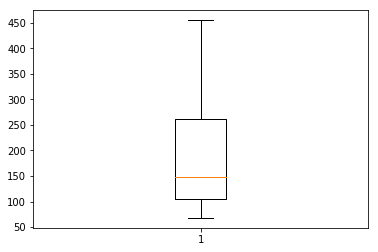

In [85]:
plt.boxplot(mpg_df['disp'])
plt.show()

In [86]:
temp = pd.DataFrame(mpg_df.hp.str.isdigit())
temp

,hp
0,True
1,True
2,True
3,True
4,True
5,True
6,True
7,True
8,True
9,True


In [87]:
temp[temp['hp']==False]

,hp
32,False
126,False
330,False
336,False
354,False
374,False


In [16]:
mpg_df = mpg_df.replace('?',np.NaN)

In [17]:
null_columns = mpg_df.columns[mpg_df.isnull().any()]
mpg_df[null_columns].isnull().sum()

hp    6
dtype: int64

In [18]:
mpg_df[mpg_df.isnull().any(axis = 1)]

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_type
32,25.0,4,98.0,NaN,2046,19.0,71,1,1
126,21.0,6,200.0,NaN,2875,17.0,74,1,0
330,40.9,4,85.0,NaN,1835,17.3,80,2,1
336,23.6,4,140.0,NaN,2905,14.3,80,1,1
354,34.5,4,100.0,NaN,2320,15.8,81,2,1
374,23.0,4,151.0,NaN,3035,20.5,82,1,1


In [19]:
# mpg_df['hp'].fillna(mpg_df['hp'].median(),inplace = True)   
mpg_df = mpg_df.fillna(mpg_df.median()) # we can use this function also

In [20]:
mpg_df['hp'].dtype

dtype('O')

In [21]:
mpg_df['hp'] = mpg_df['hp'].astype('float64')
mpg_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cyl,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
disp,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
hp,398.0,104.304020,38.222625,46.0,76.000,93.5,125.000,230.0
wt,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acc,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
yr,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
origin,398.0,1.572864,0.802055,1.0,1.000,1.0,2.000,3.0
car_type,398.0,0.530151,0.499718,0.0,0.000,1.0,1.000,1.0


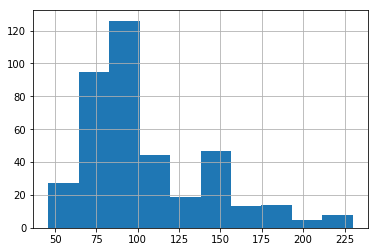

In [22]:
mpg_df.hp.hist()     # a different way to plot

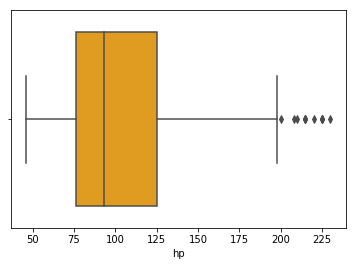

In [23]:
sns.boxplot(mpg_df.hp,color = 'orange')

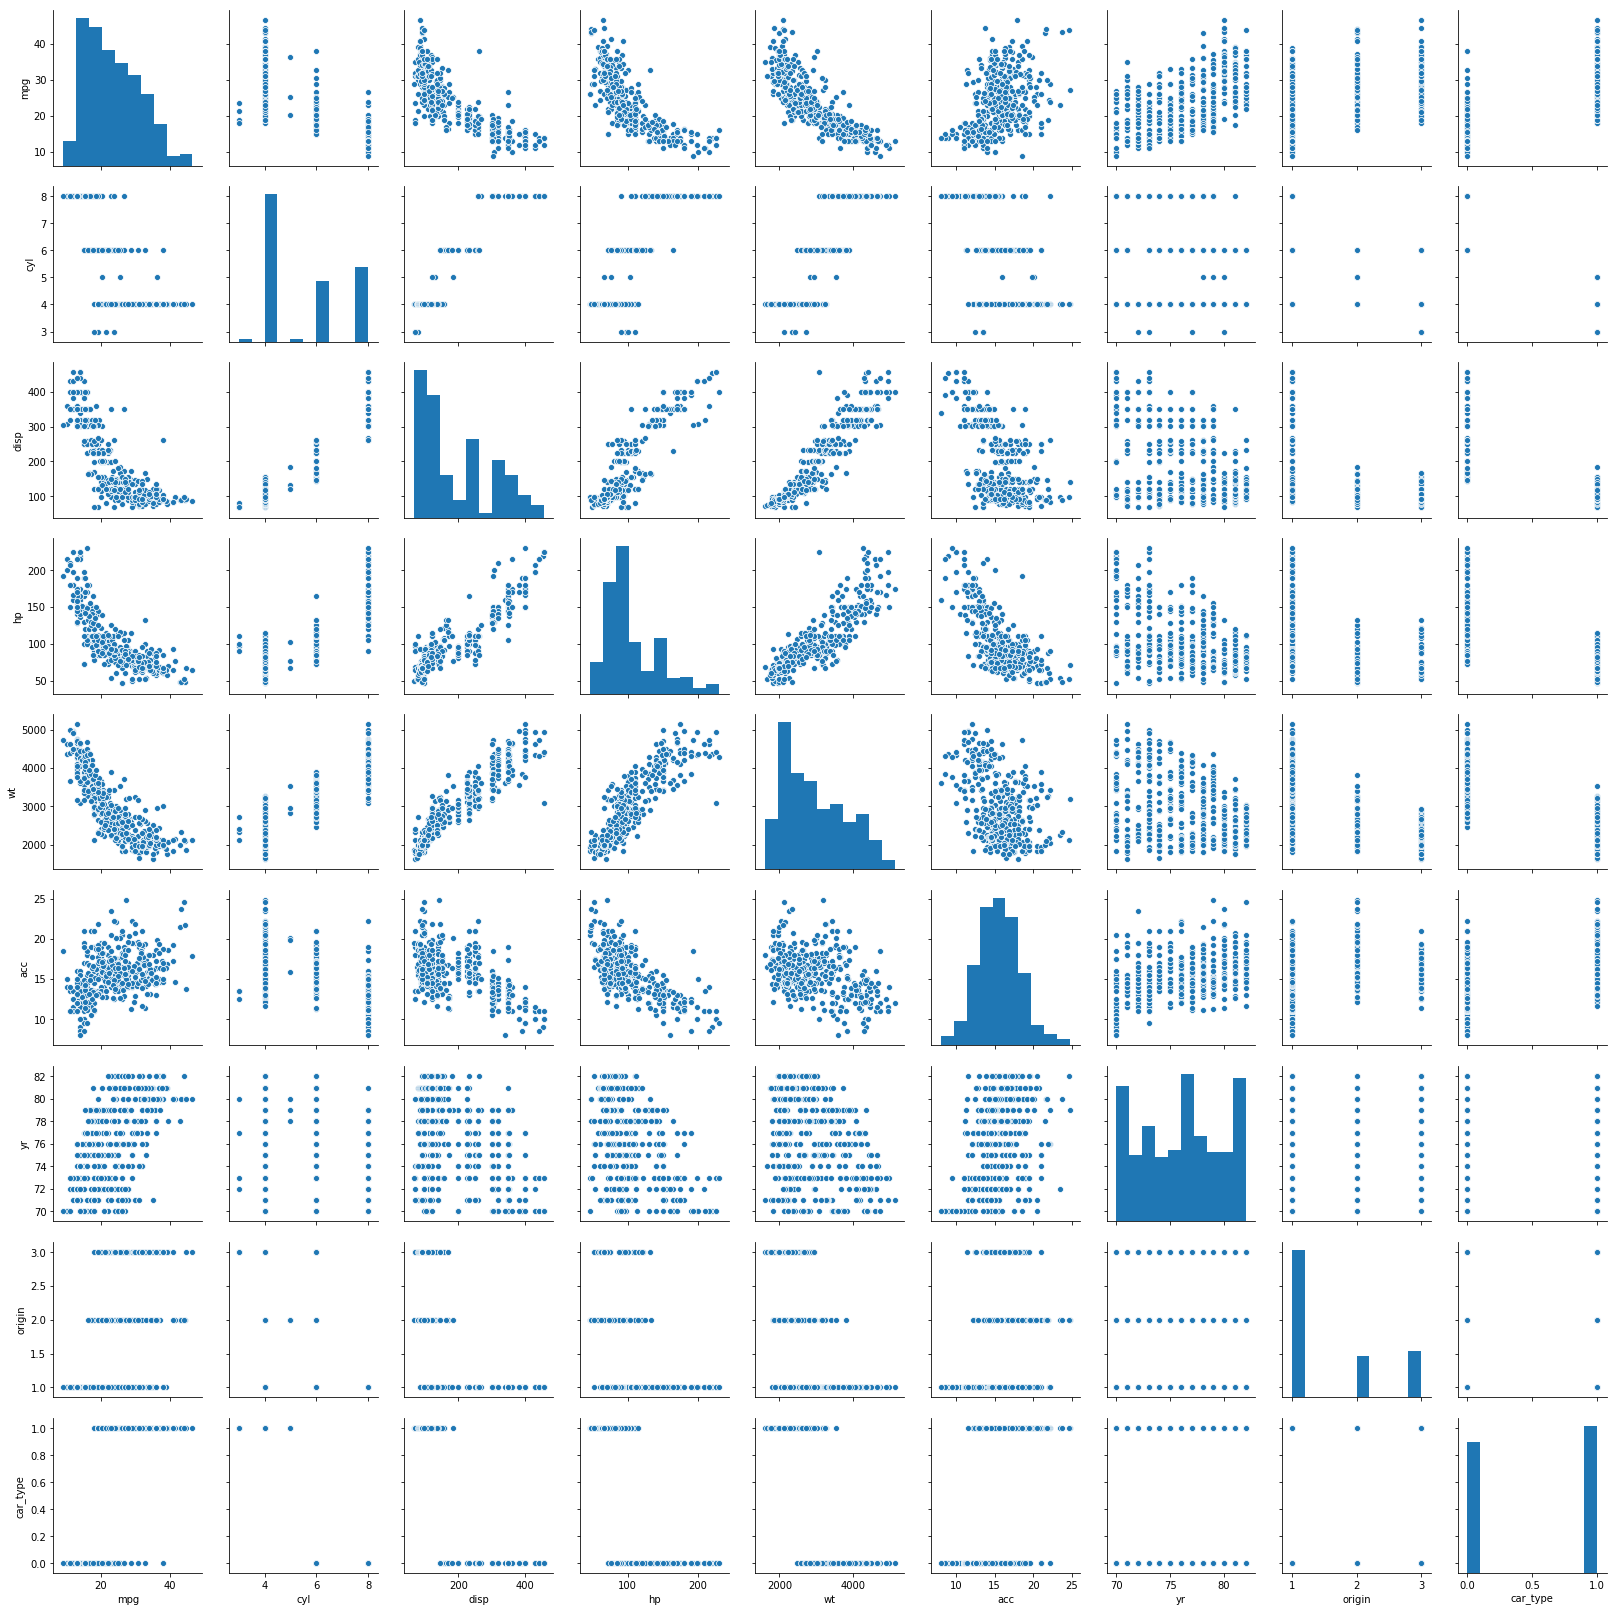

In [24]:
sns.pairplot(mpg_df)
plt.show()

c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


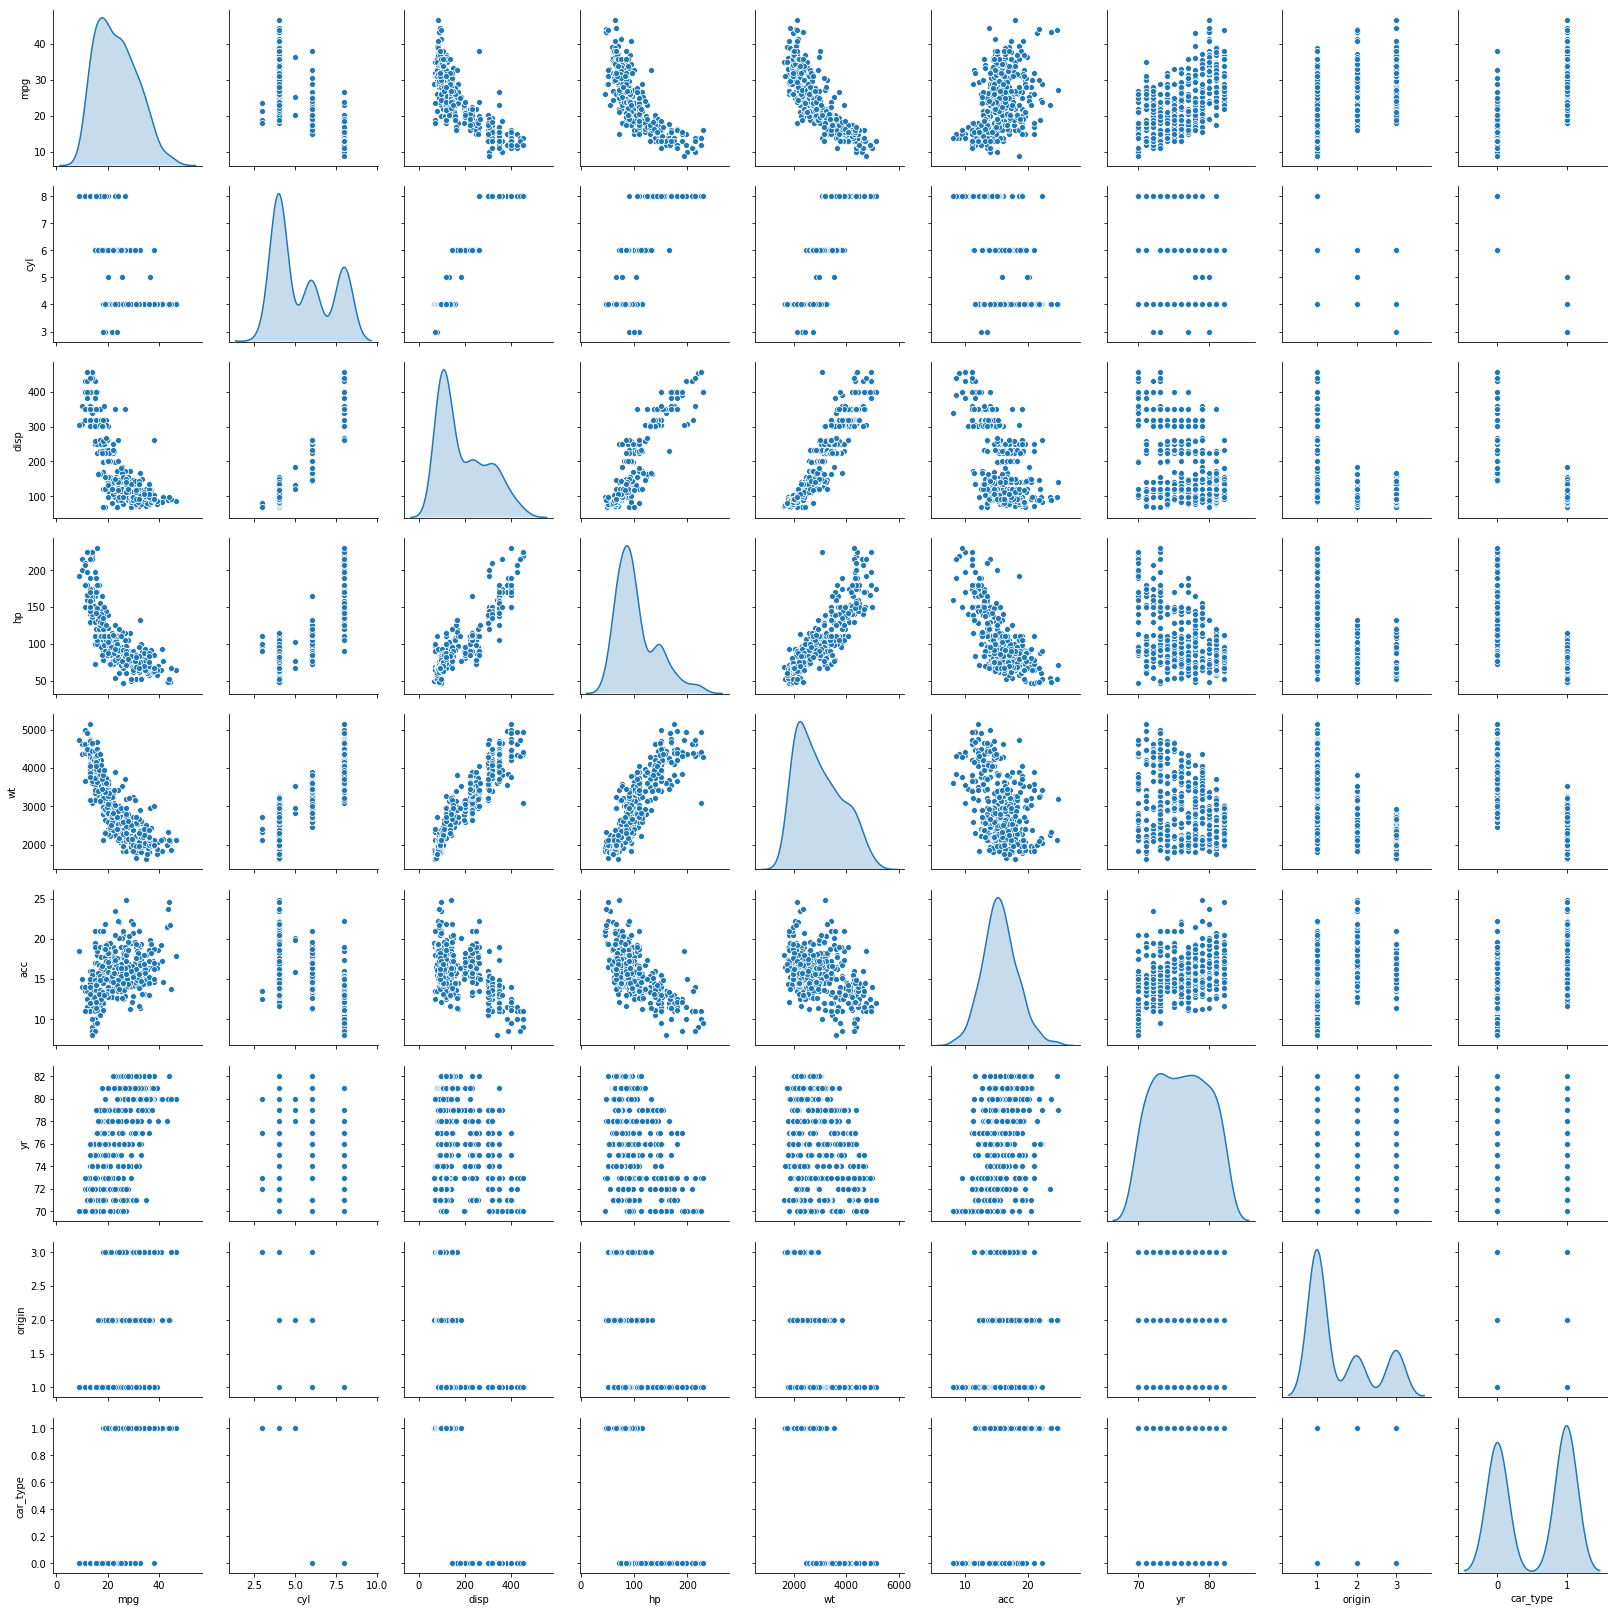

In [25]:
sns.pairplot(mpg_df,diag_kind = 'kde')
plt.show()

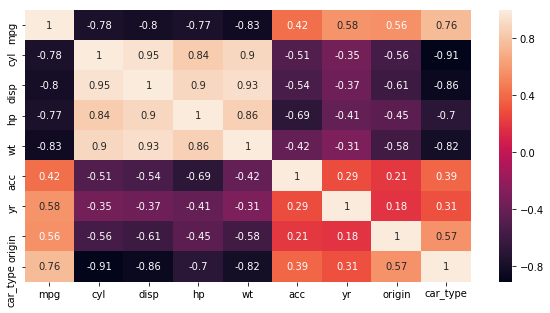

In [26]:
fig, ax = plt.subplots(figsize = (10,5))
ax = sns.heatmap(mpg_df.corr(),annot = True)
plt.show()

In [27]:
mpg_df.corr()

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_type
mpg,1.000000,-0.775396,-0.804203,-0.773453,-0.831741,0.420289,0.579267,0.563450,0.759207
cyl,-0.775396,1.000000,0.950721,0.841284,0.896017,-0.505419,-0.348746,-0.562543,-0.912577
disp,-0.804203,0.950721,1.000000,0.895778,0.932824,-0.543684,-0.370164,-0.609409,-0.855141
hp,-0.773453,0.841284,0.895778,1.000000,0.862442,-0.686590,-0.413733,-0.452096,-0.701399
wt,-0.831741,0.896017,0.932824,0.862442,1.000000,-0.417457,-0.306564,-0.581024,-0.815445
acc,0.420289,-0.505419,-0.543684,-0.686590,-0.417457,1.000000,0.288137,0.205873,0.385187
yr,0.579267,-0.348746,-0.370164,-0.413733,-0.306564,0.288137,1.000000,0.180662,0.305194
origin,0.563450,-0.562543,-0.609409,-0.452096,-0.581024,0.205873,0.180662,1.000000,0.572691
car_type,0.759207,-0.912577,-0.855141,-0.701399,-0.815445,0.385187,0.305194,0.572691,1.000000


In [28]:
x = mpg_df.drop(['mpg','acc','yr','disp'],axis = 1)
y = mpg_df['mpg']

In [29]:
y.shape

(398,)

In [30]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 2)

In [35]:
NNH = KNeighborsRegressor(n_neighbors = 19,weights = 'uniform',metric = 'euclidean')
NNH.fit(x_train,y_train)
x_train.head()

,cyl,hp,wt,origin,car_type
112,4,85.0,2310,1,1
283,6,90.0,3265,1,0
379,4,70.0,2125,1,1
306,6,115.0,2595,1,0
343,4,58.0,1755,3,1


In [36]:
x_train.shape

(278, 5)

In [37]:
x_test.shape

(120, 5)

In [38]:
y_pred = NNH.predict(x_test)

In [39]:
y_pred

array([13.15789474, 34.45263158, 32.33684211, 23.53684211, 26.91578947,
       13.67894737, 13.52105263, 14.65789474, 13.96842105, 18.08947368,
       18.08947368, 27.18947368, 32.47894737, 20.58421053, 33.12105263,
       25.9       , 18.67368421, 26.33157895, 32.52631579, 18.55789474,
       26.65789474, 18.55789474, 33.7       , 26.52631579, 13.96842105,
       15.05789474, 25.77894737, 23.19473684, 30.14210526, 17.14736842,
       32.42631579, 27.16315789, 26.44210526, 29.72105263, 14.31052632,
       33.12105263, 20.58421053, 32.52631579, 13.15789474, 33.67368421,
       16.52105263, 21.35263158, 22.83684211, 27.16315789, 28.6       ,
       34.02631579, 14.87894737, 13.96842105, 32.42631579, 25.98947368,
       32.29473684, 18.55789474, 26.92631579, 25.77894737, 26.81052632,
       13.96842105, 33.67368421, 20.53157895, 14.76315789, 27.16315789,
       33.12105263, 27.88421053, 32.76842105, 15.91578947, 15.13684211,
       32.64210526, 26.57894737, 22.91052632, 13.86315789, 32.76

In [47]:
np.sqrt(metrics.mean_squared_error(y_test,y_pred))

4.291262999958254

In [60]:
rmse = []
for k in range(1,26):
    NNH_ = KNeighborsRegressor(n_neighbors = k,weights = 'uniform',metric = 'euclidean')
    NNH_.fit(x_train,y_train)
    y_pred_ = NNH_.predict(x_test)
    error = np.sqrt(metrics.mean_squared_error(y_test,y_pred_))
    rmse.append(error)
    print('RMSE for k = ',k,'is:',error)

RMSE for k =  1 is: 6.204239142177978
RMSE for k =  2 is: 5.211441739096773
RMSE for k =  3 is: 4.886739426470601
RMSE for k =  4 is: 4.550980320216733
RMSE for k =  5 is: 4.428421464434778
RMSE for k =  6 is: 4.371597883561061
RMSE for k =  7 is: 4.364922991427047
RMSE for k =  8 is: 4.33090336515759
RMSE for k =  9 is: 4.410908662207533
RMSE for k =  10 is: 4.383563143532135
RMSE for k =  11 is: 4.455204032949177
RMSE for k =  12 is: 4.416554702459239
RMSE for k =  13 is: 4.393398703694583
RMSE for k =  14 is: 4.427926844411026
RMSE for k =  15 is: 4.3955936690854065
RMSE for k =  16 is: 4.360086224837856
RMSE for k =  17 is: 4.284019788454088
RMSE for k =  18 is: 4.3070177923215605
RMSE for k =  19 is: 4.291262999958254
RMSE for k =  20 is: 4.2748532382215565
RMSE for k =  21 is: 4.274738988995267
RMSE for k =  22 is: 4.2613979392558745
RMSE for k =  23 is: 4.227197101758334
RMSE for k =  24 is: 4.234683610798428
RMSE for k =  25 is: 4.227651672816324


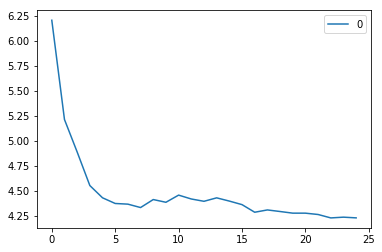

In [61]:
r = pd.DataFrame(rmse)
r.plot()

In [66]:
parameter = {'n_neighbors':np.arange(1,30)}
knn = KNeighborsRegressor()
GS = GridSearchCV(knn,parameter,cv=5)
GS.fit(x,y)

c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [67]:
GS.best_params_

{'n_neighbors': 7}

In [68]:
GS.best_score_

0.34780911805259956